# Phase 3 Project Submission

Please fill out:
* Student name: Lucas Wilkerson
* Student pace: Flex/part time
* Scheduled project review date/time: 
* Instructor name: Morgan Jones
* Blog post URL:

# Diabetes Risk Assessment and Prediction

## Project Overview

## Business Problem and Stakeholder

## Data Understanding

In [5]:
# Importing standard Packages 
import pandas as pd
import numpy as np
import math 

# Importing packages for visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Importing packages for statistics and modeling
import statsmodels.api as sm
import sklearn.metrics as metrics
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import RocCurveDisplay, confusion_matrix, classification_report, make_scorer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve , log_loss
from imblearn.over_sampling import SMOTE
from scipy.stats import kstest

from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import (VarianceThreshold, SelectKBest, f_regression, mutual_info_regression, 
    RFE, RFECV)




## Data Preparation/ Preprocessing

In [6]:
# Loading Dataset
diabetes = pd.read_csv('diabetes_2.csv')

#Previewing first 5 rows 
diabetes.head()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
0,26,1,20.1,119,81,5.80,4.36,0.86,0.90,2.43,12.0,5.40,63.8,5.40,3.0,3.0,0,0
1,40,1,17.7,97,54,4.60,3.70,1.02,1.50,2.04,9.2,3.70,70.3,4.10,1.0,1.0,0,0
2,40,2,19.7,85,53,5.30,5.87,1.29,1.75,3.37,10.1,4.10,61.1,4.85,3.0,3.0,0,0
3,43,1,23.1,111,71,4.50,4.05,0.74,1.27,2.60,36.5,4.38,73.4,5.30,2.0,3.0,0,0
4,36,1,26.5,130,82,5.54,6.69,3.49,0.91,3.64,69.3,3.86,67.5,5.53,3.0,3.0,0,0


In [7]:
# Previewing general information on dataset
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4303 entries, 0 to 4302
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             4303 non-null   int64  
 1   Gender          4303 non-null   int64  
 2   BMI             4303 non-null   float64
 3   SBP             4303 non-null   int64  
 4   DBP             4303 non-null   int64  
 5   FPG             4303 non-null   float64
 6   Chol            4303 non-null   float64
 7   Tri             4303 non-null   float64
 8   HDL             4303 non-null   float64
 9   LDL             4303 non-null   float64
 10  ALT             4303 non-null   float64
 11  BUN             4303 non-null   float64
 12  CCR             4303 non-null   float64
 13  FFPG            4303 non-null   float64
 14  smoking         4303 non-null   float64
 15  drinking        4303 non-null   float64
 16  family_histroy  4303 non-null   int64  
 17  Diabetes        4303 non-null   i

Features of Dataset:
- Age
- Gender
- BMI
- SBP (Systolic Blood Pressure)
- DBP (Diastolic Blood Pressure)
- FPG (Fasting Plasma Glucose)
- FFPG (Final Fasting Plasma Glucose)
- Cholesterol
- Triglyceride
- HDL (High-Density Lipoprotein)
- LDL (Low-Density Lipoprotein)
- ALT (Alanine Aminotransferase)
- BUN (Blood urea nitrogen)
- CCR (Creatinine Clearance)
- Smoking Status
- Drinking Status
- Family History
- Diabetes: presence of Diabetes 

In [8]:
# Checking for missing values
diabetes.isna().sum()


Age               0
Gender            0
BMI               0
SBP               0
DBP               0
FPG               0
Chol              0
Tri               0
HDL               0
LDL               0
ALT               0
BUN               0
CCR               0
FFPG              0
smoking           0
drinking          0
family_histroy    0
Diabetes          0
dtype: int64

In [9]:
# Dropping any duplicate rows 
diabetes = diabetes.drop_duplicates()

In [10]:
# Getting number of patients with and without diabetes
diabetes['Diabetes'].value_counts()

0    3000
1    1303
Name: Diabetes, dtype: int64

In [11]:
# Getting descriptive statistics on dataset 
diabetes.describe()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
count,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000
mean,48.085057,1.351615,24.123923,123.219382,76.360446,5.226368,4.860753,1.588476,1.666765,2.976220,26.754810,4.841088,71.557080,5.729084,3.006123,3.209935,0.061585,0.302812
std,14.686155,0.477530,3.397294,17.513858,11.004056,0.781089,0.925377,1.260003,1.079377,0.892196,22.279922,1.251566,16.937394,1.424568,1.199571,0.939842,0.240428,0.459528
min,22.000000,1.000000,15.600000,72.000000,45.000000,1.780000,1.650000,0.000000,0.000000,0.540000,4.500000,1.380000,4.860753,3.200000,1.000000,1.000000,0.000000,0.000000
25%,35.000000,1.000000,21.700000,111.000000,69.000000,4.700000,4.200000,0.860000,1.130000,2.350000,14.300000,3.960000,60.000000,4.900000,3.000000,3.000000,0.000000,0.000000
50%,46.000000,1.000000,24.000000,122.000000,76.000000,5.140000,4.790000,1.280000,1.340000,2.820000,20.500000,4.760000,72.000000,5.300000,3.000000,3.000000,0.000000,0.000000
75%,59.000000,2.000000,26.300000,134.000000,83.000000,5.700000,5.430000,1.940000,1.610000,3.420000,31.050000,5.570000,82.300000,6.020000,3.000000,3.000000,0.000000,1.000000
max,93.000000,2.000000,45.800000,200.000000,134.000000,6.990000,11.650000,32.640000,4.860753,6.270000,436.200000,17.730000,307.000000,29.700000,4.860753,4.860753,1.000000,1.000000


In [12]:
#Getting value_counts for whole dataset
for col in diabetes:
        print (diabetes[col].value_counts())

34    169
33    137
35    137
37    128
29    121
     ... 
91      2
90      2
23      2
22      2
93      1
Name: Age, Length: 70, dtype: int64
1    2790
2    1513
Name: Gender, dtype: int64
23.50    62
23.40    59
26.00    59
24.80    56
26.10    55
         ..
27.48     1
19.47     1
20.76     1
26.06     1
32.50     1
Name: BMI, Length: 275, dtype: int64
122    107
111    106
123    104
129    103
110    103
      ... 
191      1
186      1
190      1
198      1
72       1
Name: SBP, Length: 111, dtype: int64
72     191
77     190
73     156
76     153
74     147
      ... 
126      1
134      1
47       1
111      1
48       1
Name: DBP, Length: 75, dtype: int64
5.10    97
5.00    93
4.90    77
5.20    71
5.30    71
        ..
2.95     1
3.57     1
3.64     1
3.27     1
3.70     1
Name: FPG, Length: 361, dtype: int64
4.00    70
4.50    49
5.00    47
4.60    41
4.20    40
        ..
6.51     1
8.25     1
7.25     1
2.61     1
2.93     1
Name: Chol, Length: 486, dtype: int64
1.00  

When looking over the values, units for glucose measurements(FPG, FFPG)and lipid measurements (Chol, Tri, HDL, LDL) are presented in metric units (mmol). While initially there seems to be no null/missing values, upon review of  value counts there is an abnormal value, 4.860753, that seems to be common in most columns. This may be a placeholder for missing values. This will need to be addressed. 

The current dataset contains 4303 entries with 18 columns which contain numerical data types. Looking further into our dataset, the column Diabetes is a binary classification variable. This is the target variable in which a value of 0 represents absense of diabetes and a value of 1 represents presence of diabetes. 

Regarding the Diabetes column there are 3000 entries showing no diabetes diagnosis while 1303 indicate a diabetes diagnosis. 

In [13]:
# Create a new DataFrame to store the filtered data
filtered_diabetes = diabetes.copy()

# Value to drop
value_to_drop = 4.860753

# Loop through the columns and drop rows containing the value
for col in diabetes.columns:
    filtered_diabetes = filtered_diabetes[filtered_diabetes[col] != value_to_drop]

# Reset the index of the filtered DataFrame
filtered_diabetes.reset_index(drop=True, inplace=True)

# Print the filtered DataFrame
print(filtered_diabetes)

      Age  Gender   BMI  SBP  DBP   FPG  Chol   Tri   HDL   LDL   ALT   BUN  \
0      26       1  20.1  119   81  5.80  4.36  0.86  0.90  2.43  12.0  5.40   
1      40       1  17.7   97   54  4.60  3.70  1.02  1.50  2.04   9.2  3.70   
2      40       2  19.7   85   53  5.30  5.87  1.29  1.75  3.37  10.1  4.10   
3      43       1  23.1  111   71  4.50  4.05  0.74  1.27  2.60  36.5  4.38   
4      36       1  26.5  130   82  5.54  6.69  3.49  0.91  3.64  69.3  3.86   
...   ...     ...   ...  ...  ...   ...   ...   ...   ...   ...   ...   ...   
3255   77       1  22.9  134   73  5.52  4.02  1.28  1.23  2.25  42.2  4.34   
3256   54       1  23.4  126   75  6.82  5.00  1.50  1.24  2.98   8.0  3.50   
3257   67       1  24.6  138   81  4.85  3.89  1.38  1.14  2.17  18.1  4.73   
3258   60       2  29.0  101   60  6.70  5.91  1.29  1.73  2.85  18.9  7.33   
3259   37       1  34.3  120   71  4.97  5.42  2.66  1.08  2.87  81.0  4.61   

       CCR  FFPG  smoking  drinking  family_histroy

In [14]:
diabetes_df = filtered_diabetes.copy()
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3260 entries, 0 to 3259
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             3260 non-null   int64  
 1   Gender          3260 non-null   int64  
 2   BMI             3260 non-null   float64
 3   SBP             3260 non-null   int64  
 4   DBP             3260 non-null   int64  
 5   FPG             3260 non-null   float64
 6   Chol            3260 non-null   float64
 7   Tri             3260 non-null   float64
 8   HDL             3260 non-null   float64
 9   LDL             3260 non-null   float64
 10  ALT             3260 non-null   float64
 11  BUN             3260 non-null   float64
 12  CCR             3260 non-null   float64
 13  FFPG            3260 non-null   float64
 14  smoking         3260 non-null   float64
 15  drinking        3260 non-null   float64
 16  family_histroy  3260 non-null   int64  
 17  Diabetes        3260 non-null   i

In [15]:
# Getting number of patients with and without diabetes
diabetes_df['Diabetes'].value_counts()

0    3000
1     260
Name: Diabetes, dtype: int64

After cleaning and preparation the cleaned dataset now contains 3260 rows with 18 columns containing numerical data types. Our target variable is the presence of diabetes which is indicated by the "Diabetes" column. Our independent, or feature, variables contain various health and lifestyle indicators ranging from numerical columns containing lab values of various health markers to categorical columns, such as smoking, drinking, and gender.  

## Data Analysis

In [16]:
diabetes_df.corr()["Diabetes"].sort_values(ascending = False)

Diabetes          1.000000
FFPG              0.525417
FPG               0.362254
Age               0.337337
SBP               0.190874
BMI               0.157559
Tri               0.115426
DBP               0.113250
BUN               0.103984
Chol              0.098017
family_histroy    0.074080
LDL               0.072715
ALT               0.068399
drinking          0.029131
CCR               0.016781
Gender           -0.067812
HDL              -0.083152
smoking          -0.101890
Name: Diabetes, dtype: float64

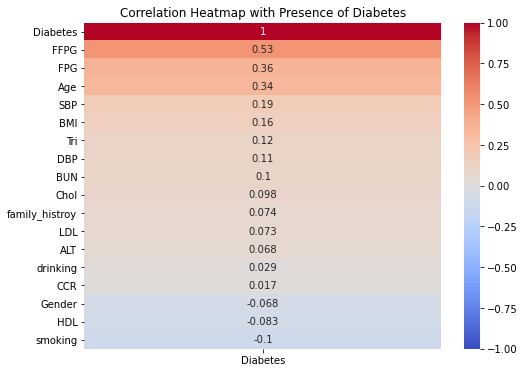

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(diabetes_df.corr()[['Diabetes']].sort_values(by='Diabetes', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap with Presence of Diabetes')
plt.show()

Looking at the correlations of the current variables we see that the top 3 highest correlates are:

- FFPG (Final Fasting Plasma Glucose): highest correlation at 0.53
- FPG (Fasting Plasma Glucose): 2nd highest correlation at 0.36
- Age: 3rd highest correlation at 0.34

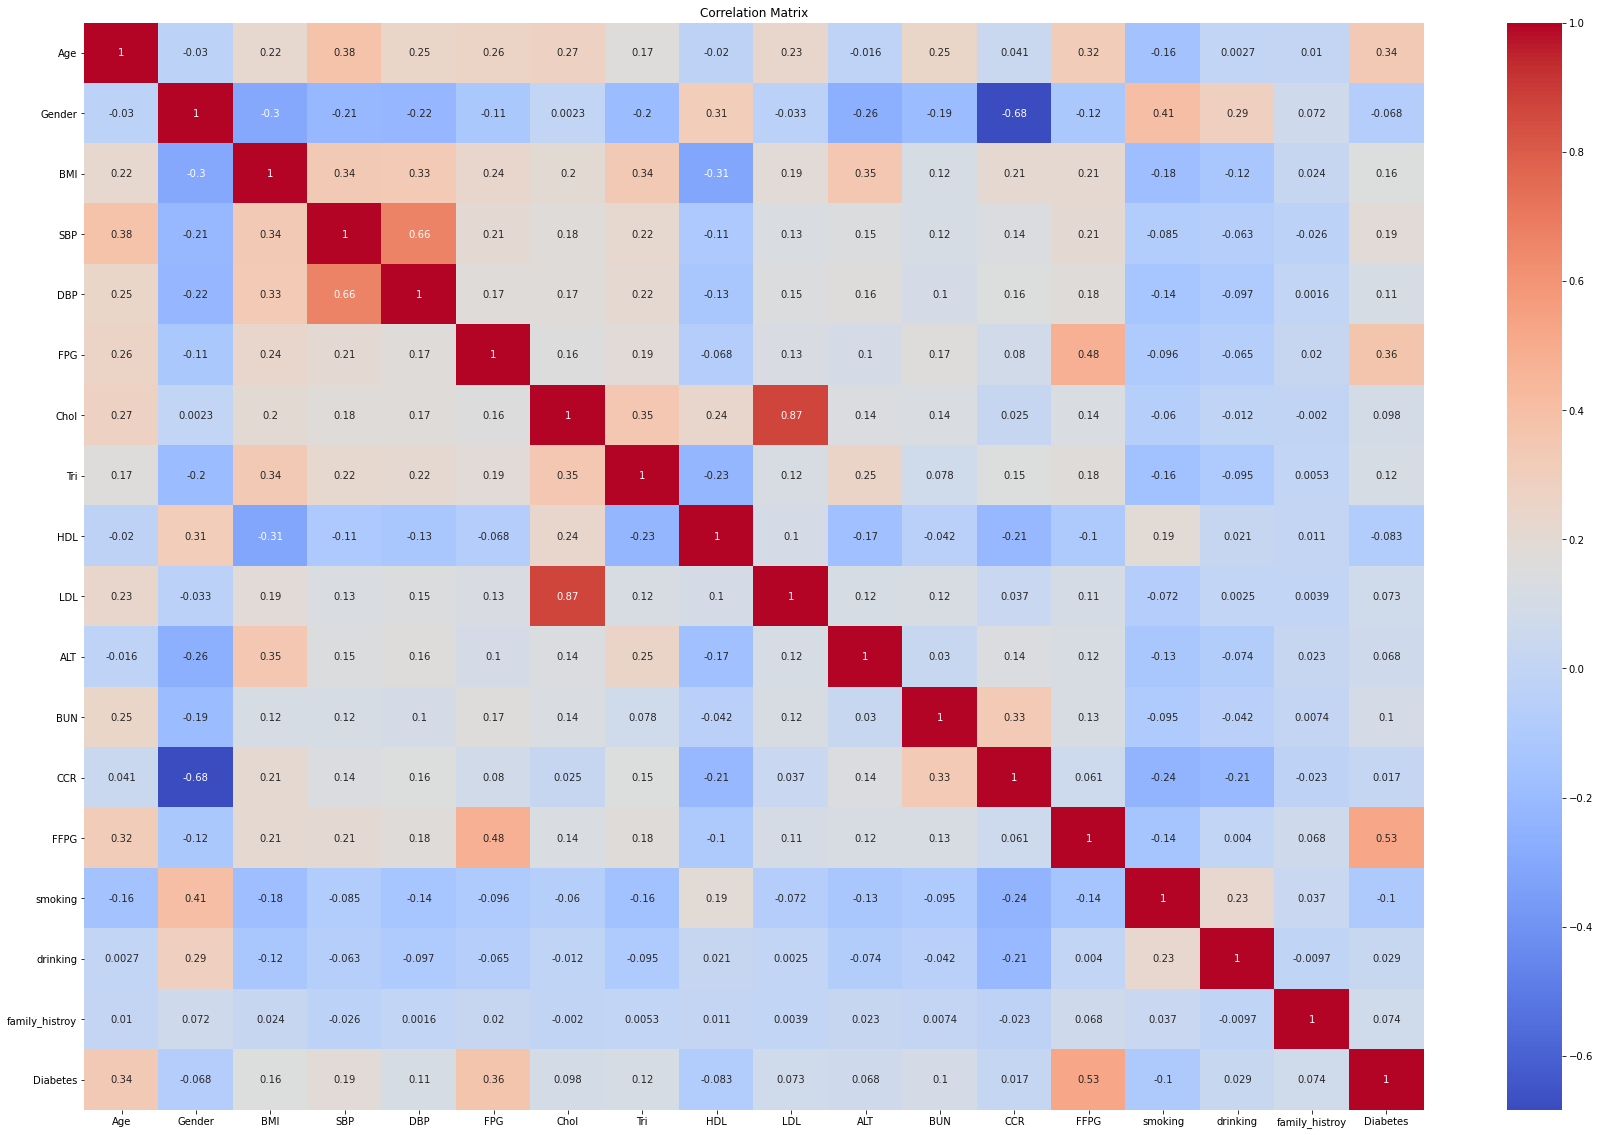

In [18]:
#Generating Correlation matrix
corr_matrix = diabetes_df.corr()
fig, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)
ax.set_title('Correlation Matrix')
plt.show()

Upon looking at the correlation matrix, two relationships standout which include:
- CHOL and LDL: 0.87
- SBP and DBP: 0.66

I will leave these variables in for the current time being for the baseline model. May need to address these in future iterations. 

# 1st Baseline "Dummy" Model

In [19]:
from sklearn.dummy import DummyClassifier

#Separating target variable from predictors
y = diabetes_df['Diabetes']
X = diabetes_df.drop('Diabetes', axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
#Instantiate the classifier
# Dummy model that will always choose the majority 
dummy_model = DummyClassifier(strategy="most_frequent")

# Fit the model to the data
dummy_model.fit(X_train, y_train) 

# Making predictions 

dummy_model.predict(X_train)


array([0, 0, 0, ..., 0, 0, 0])

In [21]:
y_pred = dummy_model.predict(X_test)

## Model Evaluation

In [22]:
dummy_score = dummy_model.score(X_test, y_test)
dummy_score

0.9190184049079755

In [23]:
# Using cross-validation to see model performance to new data
cv_results = cross_val_score(dummy_model, X_train, y_train, cv=5)
cv_results

array([0.92229039, 0.9202454 , 0.9202454 , 0.9202454 , 0.9202454 ])

We can see our cross-validation yielded high accuracy scores. 

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       749
           1       0.00      0.00      0.00        66

    accuracy                           0.92       815
   macro avg       0.46      0.50      0.48       815
weighted avg       0.84      0.92      0.88       815



/Users/lucaswilkerson/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
# Confusion Matrix
confusion_matrix(y_train, dummy_model.predict(X_train))

array([[2251,    0],
       [ 194,    0]])

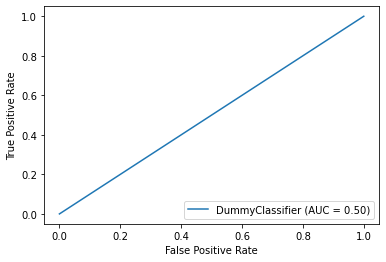

In [26]:
# Plotting ROC Curve
plot_roc_curve(dummy_model, X_train, y_train)

## Dummy Model Additional Class

In [20]:
"""# Making a class to organize model and cross-validation
class ModelWithCV():
    '''Structure to save the model and more easily see its crossvalidation'''
    
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        #
        if cv_now:
            self.cross_validate()
        
    def cross_validate(self, X=None, y=None, kfolds=10):
        '''
        Perform cross-validation and return results.
        
        Args: 
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          kfolds:
            Optional; Number of folds for CV (default is 10)  
        '''
        
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

    def print_cv_summary(self):
        cv_summary = (
        f'''CV Results for `{self.name}` model:
            {self.cv_mean:.5f} ± {self.cv_std:.5f} accuracy
        ''')
        print(cv_summary)

        
    def plot_cv(self, ax):
        '''
        Plot the cross-validation values using the array of results and given 
        Axis for plotting.
        '''
        ax.set_title(f'CV Results for `{self.name}` Model')
        # Thinner violinplot with higher bw
        sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
        sns.swarmplot(
                y=self.cv_results,
                color='orange',
                size=10,
                alpha= 0.8,
                ax=ax
        )

        return ax
        """

In [21]:
"""dummy_model_results = ModelWithCV(
                        model=dummy_model,
                        model_name='dummy',
                        X=X_train, 
                        y=y_train
)"""

CV Results for `dummy` model:
            0.92066 ± 0.00187 accuracy
        


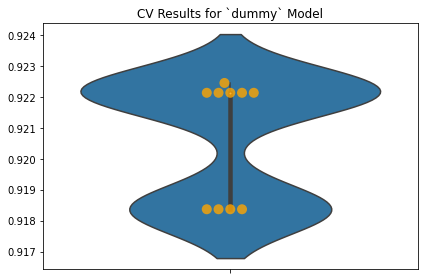

In [22]:
"""
fig, ax = plt.subplots()

ax = dummy_model_results.plot_cv(ax)
plt.tight_layout();

dummy_model_results.print_cv_summary() """

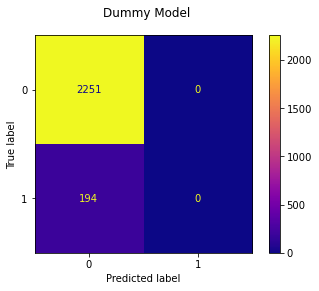

In [23]:
"""
fig, ax = plt.subplots()

fig.suptitle("Dummy Model")

plot_confusion_matrix(dummy_model, X_train, y_train, ax=ax, cmap="plasma");"""

## End of Dummy Model Additional Info

## Baseline Model 

In [27]:
#Separating target variable from predictors
y = diabetes_df['Diabetes']
X = diabetes_df.drop('Diabetes', axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [28]:
sm = SMOTE()
#fit
X_train_resample,y_train_resample = sm.fit_resample(X_train,y_train)

In [29]:
# Scaling the dataset
scaler = StandardScaler()

# Transform the training and test sets
X_train_scaled = scaler.fit_transform(X_train_resample)
X_test_scaled = scaler.transform(X_test)

# Convert into a Dataframe
scaled_data = pd.DataFrame(X_train_scaled, columns = X_train_resample.columns)
scaled_data.head()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy
0,-1.520151,-0.554599,-1.565582,-0.342275,-0.323385,0.341187,-0.869595,-1.219286,0.868973,-0.482116,0.226632,-0.037813,-0.215865,-0.917241,0.735894,-1.876134,-0.199306
1,1.135859,1.803103,0.787829,1.205948,-0.044588,-0.256636,0.031992,7.344950,-1.013132,-2.511648,-0.287861,-0.300518,0.463229,-0.719357,0.735894,0.489199,-0.199306
2,-1.111534,-0.554599,-1.813310,-1.724618,-0.323385,-2.063100,-0.764215,-0.031343,-0.800063,-0.691038,-0.793248,0.011444,1.076391,-0.426194,-0.479097,-1.876134,-0.199306
3,-0.294300,-0.554599,1.097489,0.321249,0.234210,0.471149,1.495608,0.944795,0.762439,1.681724,0.035404,0.290568,0.199503,-0.294271,-1.694088,-1.876134,-0.199306
4,-1.315843,1.803103,-1.410753,-1.392855,-1.159777,-0.178659,-1.876563,-1.182450,0.371813,-1.646112,-0.743164,-0.776672,-1.026822,-1.019848,0.735894,0.489199,-0.199306


In [30]:
#Instantiate the model 

baseline_model = LogisticRegression(random_state = 42)

# Fit the model to the data
baseline_model.fit(X_train_scaled, y_train_resample) 

# Making predictions 
y_base_pred= baseline_model.predict(X_test_scaled)

#

In [34]:
# Baseline test R^2
baseline_score = baseline_model.score(X_test_scaled, y_test)
baseline_r2 = baseline_score
baseline_r2

0.9042944785276074

In [32]:
# Cross Validation
base_cv = cross_val_score(baseline_model, X_train_scaled, y_train_resample)
base_cv

array([0.87791343, 0.91675916, 0.88777778, 0.90111111, 0.90111111])

In [33]:
# Classification report for confusion matrix 
baseline_report = classification_report(y_test, y_base_pred)
print(baseline_report)

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       749
           1       0.45      0.86      0.59        66

    accuracy                           0.90       815
   macro avg       0.72      0.89      0.77       815
weighted avg       0.94      0.90      0.92       815



In [ ]:
accuracy_score, f1_score, precision_score, recall_score

In [50]:
print(accuracy_score(y_test, y_base_pred))

0.9042944785276074


In [59]:
def model_scores(model, X_train, X_test, y_train, y_test):
    
    train_r2 = model.score(X_train, y_train)
    y_pred_train = model.predict(X_train)
    
    test_r2 = model.score(X_test, y_test)
    y_pred_test = model.predict(X_test)
    
  
    print("Model's R^2:", test_r2)
    print("Cross Validation Scores:", cross_val_score(model, X_train, y_train))
    
    print("Model's Accuracy Score:", accuracy_score(y_test, y_pred_test))
    print("Model's Precision Score:", precision_score(y_test, y_pred_test))
    print("Model's F1 Score:", f1_score(y_test, y_pred_test))
    print("Model's Recall Score:", recall_score(y_test, y_pred_test))

In [65]:
model_scores(baseline_model, X_train_scaled, X_test_scaled, y_train_resample, y_test)

Model's R^2: 0.9042944785276074
Cross Validation Scores: [0.87791343 0.91675916 0.88777778 0.90111111 0.90111111]
Model's Accuracy Score: 0.9042944785276074
Model's Precision Score: 0.4523809523809524
Model's F1 Score: 0.59375
Model's Recall Score: 0.8636363636363636


## Decision Tree Classifier

In [62]:
# Decision tree model classifier 
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth = 5)

dt_classifier.fit(X_train_scaled, y_train_resample)
y_tree_pred = dt_classifier.predict(X_test_scaled)

# Scoring on trained data
dt_train_score = dt_classifier.score(X_train_scaled, y_train_resample)
print('Trained data score: ', dt_train_score)

# Scoring on test data
dt_test_score = dt_classifier.score(X_test_scaled, y_test)
print('Test data score: ', dt_test_score)


Trained data score:  0.9187027987561084
Test data score:  0.8932515337423312


In [63]:
# Cross validating model
dt_cv = cross_val_score(dt_classifier, X_train_scaled, y_train_resample)
dt_cv

array([0.89234184, 0.90899001, 0.89444444, 0.90111111, 0.89777778])

In [66]:
# Checking classification metrics
model_scores(dt_classifier, X_train_scaled, X_test_scaled, y_train_resample, y_test)
    

Model's R^2: 0.8932515337423312
Cross Validation Scores: [0.89234184 0.90899001 0.89444444 0.90111111 0.89777778]
Model's Accuracy Score: 0.8932515337423312
Model's Precision Score: 0.4117647058823529
Model's F1 Score: 0.5297297297297296
Model's Recall Score: 0.7424242424242424


## K-Nearest Neighbors

In [95]:
# Instantiate KNN Model 
knn = KNeighborsClassifier()

knn.fit(X_train_scaled, y_train_resample)
knn_y_pred = knn.predict(X_test_scaled)

# Knn Train Model Score
knn_train_score = knn.score(X_train_scaled, y_train_resample)
knn_train_score
print('Trained data score: ', knn_train_score)

# Knn Test Model Score
knn_test_score = knn.score(X_test_scaled, y_test)
knn_test_score
print('Test data score: ', knn_test_score)

# Cross validating model
knn_cv = cross_val_score(knn, X_train_scaled, y_train_resample)
knn_cv
print('Cross validation scores:', knn_cv)


# Checking classification metrics
model_scores(knn, X_train_scaled, X_test_scaled, y_train_resample, y_test)

Trained data score:  0.950244335850733
Test data score:  0.8478527607361963
Cross validation scores: [0.94117647 0.92785794 0.92222222 0.93333333 0.92333333]
Model's R^2: 0.8478527607361963
Cross Validation Scores: [0.94117647 0.92785794 0.92222222 0.93333333 0.92333333]
Model's Accuracy Score: 0.8478527607361963
Model's Precision Score: 0.3013698630136986
Model's F1 Score: 0.41509433962264153
Model's Recall Score: 0.6666666666666666


In [84]:
# Classification report for confusion matrix 
knn_report = classification_report(y_test, knn_y_pred)
print(knn_report)

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       749
           1       0.30      0.67      0.42        66

    accuracy                           0.85       815
   macro avg       0.63      0.77      0.66       815
weighted avg       0.91      0.85      0.87       815



## Random Forest

In [87]:
# Random forest classifier model
# may need to tune and add n_estimators = 4
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_scaled, y_train_resample)

# Getting test predictions
y_rfc_pred = rfc.predict(X_test_scaled)

# Random Forest Train Model Score
rfc_train_score = rfc.score(X_train_scaled, y_train_resample)
rfc_train_score
print('Trained data score: ', rfc_train_score)

# Random Forest Test Model Score
rfc_test_score = rfc.score(X_test_scaled, y_test)
rfc_test_score
print('Test data score: ', rfc_test_score)

# Cross validating model
rfc_cv = cross_val_score(rfc, X_train_scaled, y_train_resample)
rfc_cv
print('Cross validation scores:', rfc_cv)


# Checking classification metrics
model_scores(rfc, X_train_scaled, X_test_scaled, y_train_resample, y_test)

Trained data score:  1.0
Test data score:  0.9325153374233128
Cross validation scores: [0.95338513 0.96448391 0.95333333 0.95555556 0.96333333]
Model's R^2: 0.9325153374233128
Cross Validation Scores: [0.95338513 0.96448391 0.95333333 0.95555556 0.96333333]
Model's Accuracy Score: 0.9325153374233128
Model's Precision Score: 0.569620253164557
Model's F1 Score: 0.6206896551724138
Model's Recall Score: 0.6818181818181818


In [55]:
# potential feature selection/engineering or pipelines

In [92]:
models = [baseline_model, dt_classifier, knn, rfc]
for model in models:
    print(model)
    print(model_scores(model, X_train_scaled, X_test_scaled, y_train_resample, y_test))

LogisticRegression(random_state=42)
Model's R^2: 0.9042944785276074
Cross Validation Scores: [0.87791343 0.91675916 0.88777778 0.90111111 0.90111111]
Model's Accuracy Score: 0.9042944785276074
Model's Precision Score: 0.4523809523809524
Model's F1 Score: 0.59375
Model's Recall Score: 0.8636363636363636
None
DecisionTreeClassifier(max_depth=5, random_state=42)
Model's R^2: 0.8932515337423312
Cross Validation Scores: [0.89234184 0.90899001 0.89444444 0.90111111 0.89777778]
Model's Accuracy Score: 0.8932515337423312
Model's Precision Score: 0.4117647058823529
Model's F1 Score: 0.5297297297297296
Model's Recall Score: 0.7424242424242424
None
KNeighborsClassifier()
Model's R^2: 0.8478527607361963
Cross Validation Scores: [0.94117647 0.92785794 0.92222222 0.93333333 0.92333333]
Model's Accuracy Score: 0.8478527607361963
Model's Precision Score: 0.3013698630136986
Model's F1 Score: 0.41509433962264153
Model's Recall Score: 0.6666666666666666
None
RandomForestClassifier(random_state=42)
Model'

I will be using recall and accuracy as evaluation metrics more so than precision. As a preventive/treatment measure, I find that having a higher recall in this case can be warranted. With diabetes being a gateway disease, early treatment and lifestyle intervention would have a higher chance for positive outcomes. 

"Out of all the patients we saw that actually had the disease, what percentage of them did our model correctly identify as having the disease?"

"A doctor that is overly obsessed with recall will have a very low threshold for declaring someone as sick because they are most worried about sick patients. Their precision will be quite low, because they classify almost everyone as sick, and don't care when they're wrong -- they only care about making sure that sick people are identified as sick."

## Parameter Tuning 
### GridSearch

In [97]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 5, 10],
    'min_samples_split': [1, 5, 10, 20]
}

gs_rfc = GridSearchCV(rfc, param_grid, cv=3)
gs_rfc.fit(X_train_scaled, y_train_resample)

gs_rfc.best_params_

/Users/lucaswilkerson/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/lucaswilkerson/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/lucaswilkerson/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/lucaswilkerson/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/lucaswilkerson/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispat

/Users/lucaswilkerson/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/lucaswilkerson/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/lucaswilkerson/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/lucaswilkerson/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/lucaswilkerson/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispat

/Users/lucaswilkerson/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/lucaswilkerson/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/lucaswilkerson/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/lucaswilkerson/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/lucaswilkerson/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispat

/Users/lucaswilkerson/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/lucaswilkerson/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/lucaswilkerson/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/lucaswilkerson/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/lucaswilkerson/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispat

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5}

### Grid Search: Decision Trees

#### Combinatoric Grid Searching

In [99]:
#Creating grid parameters

dt_param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 2, 3, 4, 5, 6],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6],
}


# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(dt_classifier, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_train_scaled, y_train_resample)

# Searching for best params
dt_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [104]:
# Decision tree model classifier 
dt_best_param = DecisionTreeClassifier(random_state=42, max_depth = None,
                                       min_samples_leaf = 1, min_samples_split = 2,
                                      criterion = 'gini')

dt_best_param.fit(X_train_scaled, y_train_resample)
dt_pred = dt_best_param.predict(X_test_scaled)

# Scoring on trained data
dt_param_train_score = dt_best_param.score(X_train_scaled, y_train_resample)
print('Trained data score: ', dt_param_train_score)

# Scoring on test data
dt_param_test_score = dt_best_param.score(X_test_scaled, y_test)
print('Test data score: ', dt_param_test_score)

# Checking classification metrics
model_scores(dt_best_param, X_train_scaled, X_test_scaled, y_train_resample, y_test)

Trained data score:  1.0
Test data score:  0.8822085889570552
Model's R^2: 0.8822085889570552
Cross Validation Scores: [0.89123196 0.9345172  0.92777778 0.92777778 0.92777778]
Model's Accuracy Score: 0.8822085889570552
Model's Precision Score: 0.36363636363636365
Model's F1 Score: 0.45454545454545453
Model's Recall Score: 0.6060606060606061


In [102]:
# Decision tree model classifier 
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth = 5)

dt_classifier.fit(X_train_scaled, y_train_resample)
y_tree_pred = dt_classifier.predict(X_test_scaled)

# Scoring on trained data
dt_train_score = dt_classifier.score(X_train_scaled, y_train_resample)
print('Trained data score: ', dt_train_score)

# Scoring on test data
dt_test_score = dt_classifier.score(X_test_scaled, y_test)
print('Test data score: ', dt_test_score)

# Checking classification metrics
model_scores(dt_classifier, X_train_scaled, X_test_scaled, y_train_resample, y_test)

Trained data score:  0.9187027987561084
Test data score:  0.8932515337423312
Model's R^2: 0.8932515337423312
Cross Validation Scores: [0.89234184 0.90899001 0.89444444 0.90111111 0.89777778]
Model's Accuracy Score: 0.8932515337423312
Model's Precision Score: 0.4117647058823529
Model's F1 Score: 0.5297297297297296
Model's Recall Score: 0.7424242424242424


## Splitting Data into Test/Train sets

In [14]:
#Separating target variable from predictors
y_target = diabetes_df['Diabetes']
X_df = diabetes_df.drop('Diabetes', axis=1)

# Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X_df, y_target, test_size=0.25, 
#                                                    random_state=42)

# Split the data into training and test sets
# Stratifying to ensure proper class proportion
X_train, X_test, y_train, y_test = train_test_split(X_df, y_target, test_size=0.25, 
                                                   random_state=42, stratify = y_target)

In [15]:
print("Train percent Diabetes:", y_train.value_counts(normalize=True)[1])
print("Test percent Diabetes: ", y_test.value_counts(normalize=True)[1])

Train percent Diabetes: 0.07975460122699386
Test percent Diabetes:  0.07975460122699386


In [16]:
# Import relevant class and function
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Instantiate a LogisticRegression with random_state=42
baseline_model = LogisticRegression(random_state=42)

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model
# on X_train and y_train
baseline_neg_log_loss_cv = cross_val_score(baseline_model, X_train, y_train, scoring="neg_log_loss")

baseline_log_loss = -(baseline_neg_log_loss_cv.mean())
baseline_log_loss

/Users/lucaswilkerson/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/lucaswilkerson/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

0.17656128058654402

In [17]:
from sklearn.metrics import log_loss
import numpy as np

log_loss(y_train, np.zeros(len(y_train)))

2.7546263382444107

In [19]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# Negative log loss doesn't exist as something we can import,
# but we can create it
neg_log_loss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

# Instantiate the model (same as previous example)
baseline_model = LogisticRegression(random_state=42)

# Create a list to hold the score from each fold
kfold_scores = np.ndarray(5)

# Instantiate a splitter object and loop over its result
kfold = StratifiedKFold()
for fold, (train_index, val_index) in enumerate(kfold.split(X_train, y_train)):
    # Extract train and validation subsets using the provided indices
    X_t, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_t, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Clone the provided model and fit it on the train subset
    temp_model = clone(baseline_model)
    temp_model.fit(X_t, y_t)
    
    # Evaluate the provided model on the validation subset
    neg_log_loss_score = neg_log_loss(temp_model, X_val, y_val)
    kfold_scores[fold] = neg_log_loss_score
    
-(kfold_scores.mean())

/Users/lucaswilkerson/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/lucaswilkerson/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

0.17656128058654402

In [20]:
#Baseline Log loss and k fold scores
print(baseline_neg_log_loss_cv)
print(kfold_scores)

[-0.18501777 -0.15587395 -0.19802172 -0.16200619 -0.18188678]
[-0.18501777 -0.15587395 -0.19802172 -0.16200619 -0.18188678]


### Applying Standard Scaler and SMOTE to Data

In [21]:

# Import relevant sklearn and imblearn classes
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

def custom_cross_val_score(estimator, X, y):
    # Create a list to hold the scores from each fold
    kfold_train_scores = np.ndarray(5)
    kfold_val_scores = np.ndarray(5)

    # Instantiate a splitter object and loop over its result
    kfold = StratifiedKFold(n_splits=5)
    for fold, (train_index, val_index) in enumerate(kfold.split(X, y)):
        # Extract train and validation subsets using the provided indices
        X_t, X_val = X.iloc[train_index], X.iloc[val_index]
        y_t, y_val = y.iloc[train_index], y.iloc[val_index]
        
        # Instantiate StandardScaler
        scaler = StandardScaler()
        # Fit and transform X_t
        X_t_scaled = scaler.fit_transform(X_t)
        # Transform X_val
        X_val_scaled = scaler.transform(X_val)
        
        # Instantiate SMOTE with random_state=42 and sampling_strategy=0.28
        sm = SMOTE(random_state=42, sampling_strategy=0.28)
        # Fit and transform X_t_scaled and y_t using sm
        X_t_oversampled, y_t_oversampled = sm.fit_resample(X_t_scaled, y_t)
        
        # Clone the provided model and fit it on the train subset
        temp_model = clone(estimator)
        temp_model.fit(X_t_oversampled, y_t_oversampled)
        
        # Evaluate the provided model on the train and validation subsets
        neg_log_loss_score_train = neg_log_loss(temp_model, X_t_oversampled, y_t_oversampled)
        neg_log_loss_score_val = neg_log_loss(temp_model, X_val_scaled, y_val)
        kfold_train_scores[fold] = neg_log_loss_score_train
        kfold_val_scores[fold] = neg_log_loss_score_val
        
    return kfold_train_scores, kfold_val_scores

model_with_preprocessing = LogisticRegression(random_state=42, class_weight={1: 0.28})
preprocessed_train_scores, preprocessed_neg_log_loss_cv = custom_cross_val_score(model_with_preprocessing, X_train, y_train)
- (preprocessed_neg_log_loss_cv.mean())

0.16098713166982828

In [22]:
print(-baseline_neg_log_loss_cv.mean())
print(-preprocessed_neg_log_loss_cv.mean())

0.17656128058654402
0.16098713166982828


In [23]:
print("Train:     ", -preprocessed_train_scores)
print("Validation:", -preprocessed_neg_log_loss_cv)

Train:      [0.28256227 0.29992155 0.28631083 0.28364321 0.28110979]
Validation: [0.15977684 0.14725909 0.1918101  0.15228148 0.15380815]


Looking at the training and validation scores, being that the validation scores are performing better, it does not seem that we are overfitting.

In [24]:
model_with_preprocessing.get_params()

{'C': 1.0,
 'class_weight': {1: 0.28},
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [25]:
#Reducing Regularization
model_less_regularization = LogisticRegression(
    random_state=42,
    class_weight={1: 0.28},
    C=1e5
)

In [26]:
less_regularization_train_scores, less_regularization_val_scores = custom_cross_val_score(
    model_less_regularization,
    X_train,
    y_train
)

print("Previous Model")
print("Train average:     ", -preprocessed_train_scores.mean())
print("Validation average:", -preprocessed_neg_log_loss_cv.mean())
print("Current Model")
print("Train average:     ", -less_regularization_train_scores.mean())
print("Validation average:", -less_regularization_val_scores.mean())

Previous Model
Train average:      0.28670952891537066
Validation average: 0.16098713166982828
Current Model
Train average:      0.2865266126186202
Validation average: 0.16185320979576806


In [27]:
#Looking at an Alternative Solver

print("solver:", model_less_regularization.get_params()["solver"])
print("penalty:", model_less_regularization.get_params()["penalty"])

solver: lbfgs
penalty: l2


In [28]:
model_alternative_solver = LogisticRegression(
    random_state=42,
    class_weight={1: 0.28},
    C=1e5,
    solver="saga",
    penalty="elasticnet",
    l1_ratio=0.5
)

alternative_solver_train_scores, alternative_solver_val_scores = custom_cross_val_score(
    model_alternative_solver,
    X_train,
    y_train
)

print("Previous Model (Less Regularization)")
print("Train average:     ", -less_regularization_train_scores.mean())
print("Validation average:", -less_regularization_val_scores.mean())
print("Current Model")
print("Train average:     ", -alternative_solver_train_scores.mean())
print("Validation average:", -alternative_solver_val_scores.mean())

/Users/lucaswilkerson/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/lucaswilkerson/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/lucaswilkerson/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Previous Model (Less Regularization)
Train average:      0.2865266126186202
Validation average: 0.16185320979576806
Current Model
Train average:      0.28646219146970175
Validation average: 0.16156105034078988


/Users/lucaswilkerson/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/lucaswilkerson/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [29]:
# Adjusting MaxIter param to correct the warning

model_more_iterations = LogisticRegression(
    random_state=42,
    class_weight={1: 0.28},
    C=1e5,
    solver="saga",
    penalty="elasticnet",
    l1_ratio=0.5,
    max_iter=2000
)

more_iterations_train_scores, more_iterations_val_scores = custom_cross_val_score(
    model_more_iterations,
    X_train,
    y_train
)

print("Previous Best Model (Less Regularization)")
print("Train average:     ", -less_regularization_train_scores.mean())
print("Validation average:", -less_regularization_val_scores.mean())
print("Previous Model with This Solver")
print("Train average:     ", -alternative_solver_train_scores.mean())
print("Validation average:", -alternative_solver_val_scores.mean())
print("Current Model")
print("Train average:     ", -more_iterations_train_scores.mean())
print("Validation average:", -more_iterations_val_scores.mean())

Previous Best Model (Less Regularization)
Train average:      0.2865266126186202
Validation average: 0.16185320979576806
Previous Model with This Solver
Train average:      0.28646219146970175
Validation average: 0.16156105034078988
Current Model
Train average:      0.2865230701908308
Validation average: 0.16184548701023682


### Final Model through this Iteration 
#### Preprocessing with the Full Dataset

In [46]:
final_model = model_with_preprocessing

In [47]:
# Instantiate StandardScaler
scaler = StandardScaler()
# Fit and transform X_train
X_train_scaled = scaler.fit_transform(X_train)
# Transform X_test
X_test_scaled = scaler.transform(X_test)

# Instantiate SMOTE with random_state=42 and sampling_strategy=0.28
sm = SMOTE(random_state=42, sampling_strategy=0.28)
# Fit and transform X_train_scaled and y_train using sm
X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train_scaled, y_train)

#### Fitting the Model on the Full Training Data

In [48]:
final_model.fit(X_train_oversampled, y_train_oversampled)

LogisticRegression(class_weight={1: 0.28}, random_state=42)

In [49]:
LogisticRegression(C=100000.0, class_weight={1: 0.28}, random_state=42)

LogisticRegression(C=100000.0, class_weight={1: 0.28}, random_state=42)

In [51]:
#Checking Log Loss
log_loss(y_test, final_model.predict_proba(X_test_scaled))

0.17079665558072943

In [53]:
# Checking Accuracy Score

from sklearn.metrics import accuracy_score

accuracy_score(y_test, final_model.predict(X_test_scaled))

0.9349693251533743

In [54]:
# Checking Precision Score

# Import the relevant function
from sklearn.metrics import precision_score

# Display the precision score
precision_score(y_test, final_model.predict(X_test_scaled))

0.7307692307692307

In [55]:
# Checking Recall Score


# Import the relevant function
from sklearn.metrics import recall_score

# Display the recall score
recall_score(y_test, final_model.predict(X_test_scaled))

0.2923076923076923

# Splitting Data into Train/Test for Additional Models

# Additional Modeling and Tuning

In [64]:
#Instantiate a scaler and transform values

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

# Modeling 

## Building Baseline Model

### Vanilla Model 

In [29]:
#Instantiate a LR model, adjusting for weight and fitting it to the scaled data

#baseline_logreg = LogisticRegression(random_state = 42, class_weight = 'balanced').fit(X_train_scaled, y_train)

logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear', random_state = 42)
baseline_logreg = logreg.fit(X_train_scaled, y_train)
baseline_logreg

LogisticRegression(C=1000000000000.0, fit_intercept=False, random_state=42,
                   solver='liblinear')

In [65]:
#Calculating log loss
baseline_neg_log_loss_cv = cross_val_score(baseline_logreg, X_train_scaled, y_train, scoring="neg_log_loss")

baseline_log_loss = -(baseline_neg_log_loss_cv.mean())
baseline_log_loss

0.17561480077553698

In [51]:
# Printing off some baseline metric scores

preds= baseline_logreg.predict(X_test_scaled)
#probs = baseline_logreg.predict_proba(X_test_scaled)

print('***  BASELINE TEST SCORES ***')
#print("log loss: ", log_loss(y_test, probs))
print("accuracy: ", accuracy_score(y_test, preds))
print("precision:", precision_score(y_test, preds, average = "weighted"))
print("recall:   ", recall_score(y_test, preds, average = "weighted"))
print("F1:  ", f1_score(y_test, preds, average = "weighted"))


***  BASELINE TEST SCORES ***
accuracy:  0.947239263803681
precision: 0.9425229780444504
recall:    0.947239263803681
F1:   0.9396771729077397


In [52]:
print(classification_report(y_pred = preds, y_true = y_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       749
           1       0.83      0.44      0.57        66

    accuracy                           0.95       815
   macro avg       0.89      0.72      0.77       815
weighted avg       0.94      0.95      0.94       815



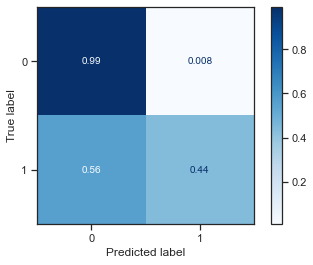

In [53]:
# Displaying a confusion matrix 
plot_confusion_matrix(baseline_logreg, X_test_scaled, y_test,
                     cmap=plt.cm.Blues, normalize = 'true')
plt.grid(False)
plt.show()

## Smote 

In [40]:
from imblearn.over_sampling import SMOTE

In [43]:
# Previous original class distribution
print('Original class distribution: \n')
print(y_target.value_counts())
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

0    3000
1     260
Name: Diabetes, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

1    2251
0    2251
Name: Diabetes, dtype: int64


In [54]:
#Instantiate a LR model, adjusting for weight and fitting it to the scaled data

#baseline_logreg = LogisticRegression(random_state = 42, class_weight = 'balanced').fit(X_train_scaled, y_train)

logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear', random_state = 42)
smote_logreg = logreg.fit(X_train_resampled, y_train_resampled)
smote_logreg

# Printing off some baseline metric scores

preds_smote= smote_logreg.predict(X_test_scaled)
#probs = baseline_logreg.predict_proba(X_test_scaled)

print('***  BASELINE TEST SCORES ***')
#print("log loss: ", log_loss(y_test, probs))
print("accuracy: ", accuracy_score(y_test, preds_smote))
print("precision:", precision_score(y_test, preds_smote))
print("recall:   ", recall_score(y_test, preds_smote))
print("F1:  ", f1_score(y_test, preds_smote))


***  BASELINE TEST SCORES ***
accuracy:  0.8662576687116564
precision: 0.9358492056299712
recall:    0.8662576687116564
F1:   0.8892209014625899


In [45]:
print(classification_report(y_pred = preds_smote, y_true = y_test))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92       749
           1       0.36      0.86      0.51        66

    accuracy                           0.87       815
   macro avg       0.67      0.87      0.72       815
weighted avg       0.94      0.87      0.89       815



## Finding Best Classifer Model 

In [48]:
# Finding best classifier:

rf = RandomForestClassifier(class_weight = 'balanced')
knn = KNeighborsClassifier( )
dt = DecisionTreeClassifier(class_weight = 'balanced')

models = [rf, knn, dt, baseline_logreg]

for model in models:
    model.fit(X_train_scaled, y_train)
    y_preds_test = model.predict(X_test_scaled)
    training_preds = model.predict(X_train_scaled)
    delta = ((f1_score(y_train, training_preds, average = 'weighted'))-f1_score(y_test, y_preds_test, average = 'weighted'))
    print('Model:', model)
    print('Training F1:', f1_score(y_train, training_preds, average = 'weighted'))
    print('Test F1:', f1_score(y_test, y_preds_test, average = 'weighted'))
    print('F1-Score Delta: {:.3}'.format(delta))
    print('\n****************************\n')
    

Model: RandomForestClassifier(class_weight='balanced')
Training F1: 1.0
Test F1: 0.9250963083443026
F1-Score Delta: 0.0749

****************************

Model: KNeighborsClassifier()
Training F1: 0.9286014711022473
Test F1: 0.9114493521879148
F1-Score Delta: 0.0172

****************************

Model: DecisionTreeClassifier(class_weight='balanced')
Training F1: 1.0
Test F1: 0.9210608425585519
F1-Score Delta: 0.0789

****************************

Model: LogisticRegression(C=1000000000000.0, fit_intercept=False, random_state=42,
                   solver='liblinear')
Training F1: 0.9321354736200238
Test F1: 0.9396771729077397
F1-Score Delta: -0.00754

****************************



## Random Forest Confusion Matrix

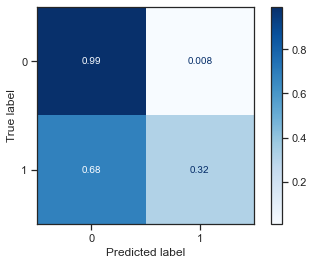

In [55]:
# Displaying a confusion matrix 
plot_confusion_matrix(rf, X_test_scaled, y_test,
                     cmap=plt.cm.Blues, normalize = 'true')
plt.grid(False)

plt.show()

## K-Nearest Neighbors Confusion Matrix

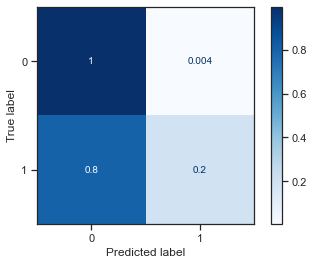

In [56]:
# Displaying a confusion matrix 
plot_confusion_matrix(knn, X_test_scaled, y_test,
                     cmap=plt.cm.Blues, normalize = 'true')
plt.grid(False)

plt.show()

## Decision Tree Confusion Matrix

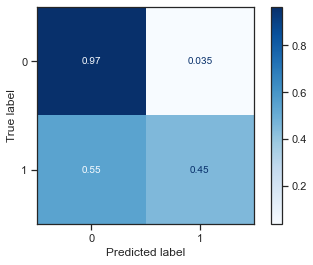

In [57]:
# Displaying a confusion matrix 
plot_confusion_matrix(dt, X_test_scaled, y_test,
                     cmap=plt.cm.Blues, normalize = 'true')
plt.grid(False)

plt.show()

## Baseline Model Confusion Matrix

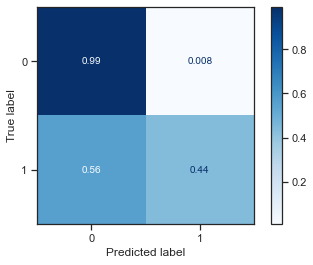

In [59]:
# Displaying a confusion matrix 
plot_confusion_matrix(baseline_logreg, X_test_scaled, y_test,
                     cmap=plt.cm.Blues, normalize = 'true')
plt.grid(False)
plt.show()

In [61]:
# Print confusion all in one cell for comparison

rf = RandomForestClassifier(class_weight = 'balanced')
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(class_weight = 'balanced')

models = [rf, knn, dt, baseline_logreg]

for model in models:
    model.fit(X_train_scaled, y_train)
    y_preds_test = model.predict(X_test_scaled)
    training_preds = model.predict(X_train_scaled)
    cnf_matrix = confusion_matrix(y_test, y_preds_test, normalize = 'true')
    print('Model:', model)
    print(cnf_matrix)
    print('\n*******************\n')


Model: RandomForestClassifier(class_weight='balanced')
[[0.98931909 0.01068091]
 [0.68181818 0.31818182]]

*******************

Model: KNeighborsClassifier()
[[0.99599466 0.00400534]
 [0.8030303  0.1969697 ]]

*******************

Model: DecisionTreeClassifier(class_weight='balanced')
[[0.96528705 0.03471295]
 [0.59090909 0.40909091]]

*******************

Model: LogisticRegression(C=1000000000000.0, fit_intercept=False, random_state=42,
                   solver='liblinear')
[[0.99198932 0.00801068]
 [0.56060606 0.43939394]]

*******************



## Baseline Linear Regression Model 

In [29]:
#Creating baseline linear regression model 
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)


train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error: ', test_mse)



Train Mean Squared Error: 0.04959349219744427
Test Mean Squared Error:  0.048820173308270695


In [31]:
baseline_model_all = sm.OLS(y_train, sm.add_constant(X_train))
baseline_model  = baseline_model_all.fit()

print(baseline_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Diabetes   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     67.52
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          1.57e-189
Time:                        15:46:34   Log-Likelihood:                 202.96
No. Observations:                2445   AIC:                            -369.9
Df Residuals:                    2427   BIC:                            -265.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.8968      0.081    -11.

In [33]:
cross_val_score(linreg, X_df, y_target, scoring="neg_mean_squared_error")


array([-0.01831558, -0.01917737, -0.02700964, -0.01923626, -0.39877301])

## Baseline Logistic Regression Model 

In [35]:
#Separating target variable from predictors
y = diabetes_df['Diabetes']
X = diabetes_df.drop('Diabetes', axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
scaler = StandardScaler()

X_V = X_val.values
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_val = scaler.transform(X_V)

In [ ]:
#Separating target variable from predictors
target = df['Outcome']
df = df.drop('Outcome', axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.25, random_state=42)


Train the Models

# Instantiate an AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(random_state=42)

# Instantiate an GradientBoostingClassifier
gbt_clf = GradientBoostingClassifier(random_state=42)


# Fit AdaBoostClassifier
adaboost_clf.fit(X_train, y_train)

# Fit GradientBoostingClassifier
gbt_clf.fit(X_train, y_train)

Model Predictions

# AdaBoost model predictions
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)

# GradientBoosting model predictions
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

#Defining function to calculate accuracy and F1 score for each model

def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_acc_and_f1_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')


#Confusion Matrix for each 

adaboost_confusion_matrix = confusion_matrix(y_test, adaboost_test_preds)
adaboost_confusion_matrix


gbt_confusion_matrix = confusion_matrix(y_test, gbt_clf_test_preds)
gbt_confusion_matrix


#Classification Report for Each

adaboost_classification_report = classification_report(y_test, adaboost_test_preds)
print(adaboost_classification_report)

gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)


Computing Cross-Validation Scores for Each Model

print('Mean Adaboost Cross-Val Score (k=5):')
print(cross_val_score(adaboost_clf, df, target, cv=5).mean())

print('Mean GBT Cross-Val Score (k=5):')
print(cross_val_score(gbt_clf, df, target, cv=5).mean())


In [ ]:
Building an XGBoost Model

# Instantiate XGBClassifier
clf = XGBClassifier()

# Fit XGBClassifier
clf.fit(X_train, y_train)

# Predict on training and test sets
training_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))


Tuning XGBoost

#Constructing our params dictionary 
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}


#Building GridSearchCV model and getting best parameters

grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))


#Getting predictions and accuracy of model 

training_preds = grid_clf.predict(X_train)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))


## Modeling 

## Evaluation

## Conclusion/Recommendations

## Limitations